# Compute Laterality Indices

### import modules

In [1]:
%matplotlib inline

In [2]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### get absolute directory of project

In [3]:
# after converstion to .py, we can use __file__ to get the module folder
try:
    thisDir = os.path.realpath(__file__)
# in notebook form, we take the current working directory (we need to be in 'notebooks/' for this!)
except:
    thisDir = '.'
# convert relative path into absolute path, so this will work with notebooks and py modules
supDir = os.path.abspath(os.path.join(os.path.dirname(thisDir), '..'))

supDir

'/data/martin/language_lat'

### get data

In [4]:
arrayDf = pd.DataFrame(['../data/interim/csv/%s'%x for x in os.listdir('../data/interim/csv/') if x.startswith('roiPercentiles_pat')])
arrayDf.columns = ['roiPc']
arrayDf.index = [x.split('roiPercentiles_')[-1].split('.')[0] for x in arrayDf['roiPc']]
arrayDf.sort_index(inplace=True)

In [ ]:
arrayDf.tail()

In [6]:
arrayDf.shape

(783, 1)

### get stored data

In [7]:
def getRawData(csvFile):
    
    rawDf = pd.read_csv(csvFile,index_col=[0,1])
    rawDf.columns = rawDf.columns.map(float)
    rawDf.sort_index(axis=1,inplace=True)
    
    return rawDf

In [8]:
pName = arrayDf.iloc[69].name

In [9]:
pName

'pat0061_a'

In [10]:
rawDf = getRawData( arrayDf.loc[pName].roiPc )

In [26]:
rawDf.tail()

-10.0  -9.9   -9.8   -9.7   -9.6   -9.5   -9.4   -9.3   -9.2   \
   Unnamed: 1                                                                  
85 right       100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
90 left        100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
   right       100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
95 left        100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
   right       100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   

               -9.1   ...     19.0   19.1   19.2   19.3   19.4   19.5   19.6  \
   Unnamed: 1         ...                                                      
85 right       100.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
90 left        100.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   right       100.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
95 left        100.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   right       100.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                19.7   19.8   19.9  
   Unnamed: 1                       
85 right         0.0    0.0    0.0  
90 left          0.0    0.0    0.0  
   right         0.0    0.0    0.0  
95 left          0.0    0.0    0.0  
   right         0.0    0.0    0.0  

[5 rows x 300 columns]

The deconstruction into numerator and denominator:

In [12]:
def makeDiff(df):
    return pd.DataFrame( (df['left']-df['right'])/100. )

In [13]:
def makeAdd(df):
    return pd.DataFrame( (df['left']+df['right'])/100. )

In [14]:
def makeBigDf(rawDf):
    bigDf = pd.DataFrame()

    for i in rawDf.index.levels[0]:

        thisDf = rawDf.loc[i].T

        diffDf = makeDiff(thisDf)
        diffDf.columns = ['L-R']

        addDf = makeAdd(thisDf)
        addDf.columns = ['L+R']

        liDf = pd.DataFrame( diffDf['L-R'] / addDf['L+R'] )
        liDf.columns = ['LI']

        pcDf = pd.DataFrame(pd.concat([addDf, diffDf, liDf], axis=1).stack(dropna=False)).T
        pcDf.index = [i]

        bigDf = pd.concat([bigDf, pcDf], axis=0)

    return bigDf

In [15]:
bigDf = makeBigDf(rawDf)

In [27]:
bigDf.tail()

-10.0           -9.9            -9.8            -9.7  ...  19.6  19.7       \
     L+R  L-R   LI   L+R  L-R   LI   L+R  L-R   LI   L+R ...    LI   L+R  L-R   
75   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
80   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
85   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
90   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
95   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   

        19.8           19.9           
    LI   L+R  L-R  LI   L+R  L-R  LI  
75 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
80 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
85 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
90 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
95 NaN   0.0  0.0 NaN   0.0  0.0 NaN  

[5 rows x 900 columns]

In [17]:
pDf = rawDf.loc[50].T

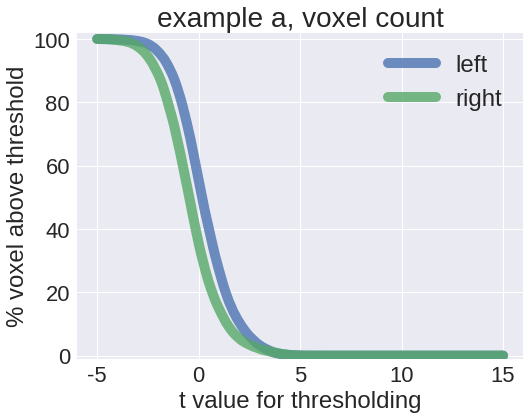

In [18]:
fig,ax1 = plt.subplots(1,1,figsize=(8,6))
for side in ['left','right']:
    ax1.plot(pDf.loc[-5.0:15.0][side],linewidth=10,alpha=0.8,label=side)
    ax1.legend(loc='best',fontsize=24)
ax1.set_ylabel('% voxel above threshold',fontsize=24)
ax1.set_xlabel('t value for thresholding',fontsize=24)
ax1.set_xticks(range(-5,16,5))
ax1.set_xticklabels(range(-5,16,5),fontsize=22)
ax1.set_yticks(range(0,101,20))
ax1.set_yticklabels(range(0,101,20),fontsize=22)
ax1.set_ylim(-1,102)
ax1.set_title('example a, voxel count',fontsize=28)
sns.despine()
plt.show()

In [19]:
myDf = bigDf.loc[50].reorder_levels([1,0])
liDf = myDf['LI']
twoDf = pd.DataFrame( myDf ).unstack(0)[50]

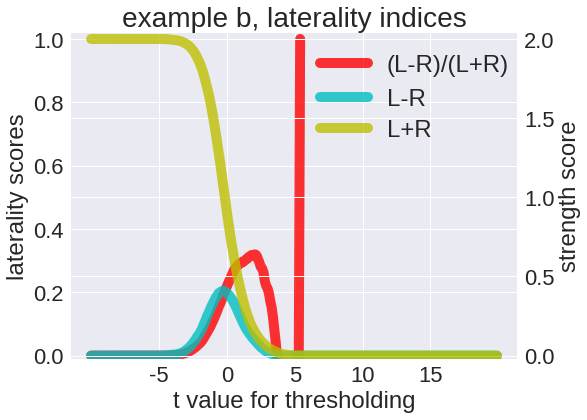

In [20]:
fig,ax1 = plt.subplots(1,1,figsize=(8,6))

ax1.plot( liDf,label='(L-R)/(L+R)',linewidth=10,alpha=0.8,color='r' )
ax1.plot( twoDf['L-R'],label='L-R',linewidth=10,alpha=0.8 ,color='c')

ax1.set_xlim(-8,17)
ax1.set_xlabel('t value for thresholding',fontsize=24)
ax1.set_ylabel('laterality scores',fontsize=24)

ax1.set_xticks(range(-5,16,5))
ax1.set_xticklabels(range(-5,16,5),fontsize=22)

ax1.set_yticks(np.arange(0,1.1,.2))
ax1.set_yticklabels(np.arange(0,1.1,.2),fontsize=22)

ax2 = ax1.twinx()
ax2.plot( twoDf['L+R'],label='L+R',linewidth=10,alpha=0.8 ,color='y')
ax2.tick_params('y')
ax2.set_ylabel('strength score',fontsize=24)

ax2.set_yticks(np.arange(0,2.1,.5))
ax2.set_yticklabels(np.arange(0,2.1,.5),fontsize=22)

#ax1.legend(loc='upper right',bbox_to_anchor=(1.03,0.65),fontsize=24)
#ax2.legend(loc='upper right',bbox_to_anchor=(0.857,0.45),fontsize=24)
ax1.legend(loc='upper right',bbox_to_anchor=(1.03,1),fontsize=24)
ax2.legend(loc='upper right',bbox_to_anchor=(0.857,0.8),fontsize=24)

ax1.set_ylim(-0.01,1.02)
ax2.set_ylim(-0.02,2.04)
ax1.set_title('example b, laterality indices',fontsize=28)
sns.despine(right=False)
#ax1.axhline(0,linewidth=3,color='k',linestyle='dashed')

plt.show()

### do all for one participant

In [21]:
def makeP(pName,arrayDf=arrayDf):
    rawDf = getRawData( arrayDf.loc[pName].roiPc )
    bigDf = makeBigDf(rawDf)
    bigDf.to_csv( '../data/interim/csv/roiLaterality_%s.csv'%pName )
    return bigDf

In [22]:
#def makeP(pFolder, pName):
#    rawDf = getRawData('%s/roiPercentiles_%s.csv' % (pFolder, pName))
#    bigDf = makeBigDf(rawDf)
#    bigDf.to_csv('%s/roiLaterality_%s.csv' % (pFolder, pName))
#    return bigDf

In [23]:
bigDf = makeP(pName)

### for all participants

In [28]:
doneList = [
    x.split('Laterality_')[-1].split('.')[0]
    for x in os.listdir('%s/data/interim/csv/' % supDir)
    if x.startswith('roiLaterality')
]
len(doneList)

783

In [29]:
for pName in arrayDf.index:
    if pName not in doneList:
        print pName
        bigDf = makeP(pName)